In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from sklearn.naive_bayes import MultinomialNB
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import re
from itertools import islice
from nltk.corpus import stopwords

In [0]:
df = pd.read_csv("/content/mydata.tsv", delimiter='\t', error_bad_lines=False)

b'Skipping line 10062: expected 18 fields, saw 19\nSkipping line 10919: expected 18 fields, saw 19\nSkipping line 11271: expected 18 fields, saw 19\nSkipping line 11285: expected 18 fields, saw 19\nSkipping line 14744: expected 18 fields, saw 19\nSkipping line 17726: expected 18 fields, saw 19\nSkipping line 21559: expected 18 fields, saw 19\nSkipping line 21846: expected 18 fields, saw 19\nSkipping line 21943: expected 18 fields, saw 19\nSkipping line 27093: expected 18 fields, saw 19\nSkipping line 28871: expected 18 fields, saw 19\nSkipping line 28925: expected 18 fields, saw 19\nSkipping line 28936: expected 18 fields, saw 19\nSkipping line 29104: expected 18 fields, saw 19\nSkipping line 29757: expected 18 fields, saw 19\nSkipping line 29790: expected 18 fields, saw 19\nSkipping line 30444: expected 18 fields, saw 19\nSkipping line 30967: expected 18 fields, saw 19\n'
b'Skipping line 33431: expected 18 fields, saw 19\nSkipping line 33480: expected 18 fields, saw 19\nSkipping line 

In [0]:
df.head()

,Unnamed: 0,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
0,1,1,Tue Jan 28 23:59:59 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...","RT @michaeleaves: As I knew she would, @elledu...",RT michaeleaves As I knew would elleduncanESPN...,"Sentiment(polarity=0.8, subjectivity=1.0)",0.8,1,en,0,988,Chumdawg19,NaN,KobeBryant,"michaeleaves, elleduncanESPN",NaN,NaN
1,2,2,Tue Jan 28 23:59:58 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",Seeing #girldad trending and all these amazing...,Seeing girldad trending amazing fathers love d...,"Sentiment(polarity=0.55, subjectivity=0.75)",0.55,0.75,en,1,0,Swiftie13152289,NaN,girldad,NaN,"Illinois, USA",NaN
2,3,3,Tue Jan 28 23:59:57 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",RT @elleduncanESPN: I’m so moved by the outpou...,RT elleduncanESPN I ’ moved outpouring support...,"Sentiment(polarity=0.04999999999999999, subjec...",0.05,0.65,en,0,0,richhgiiirl,NaN,girldad,elleduncanESPN,NaN,NaN
3,4,4,Tue Jan 28 23:59:56 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",RT @cafulezi: First son of a Nigerian (Igbo) f...,RT cafulezi First son Nigerian Igbo first son ...,"Sentiment(polarity=0.25, subjectivity=0.333333...",0.25,0.333333333,en,91,0,Marley_yabish,NaN,NaN,cafulezi,NaN,NaN
4,5,5,Tue Jan 28 23:59:55 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...","RT @michaeleaves: As I knew she would, @elledu...",RT michaeleaves As I knew would elleduncanESPN...,"Sentiment(polarity=0.8, subjectivity=1.0)",0.8,1,en,0,17954,Monyka,NaN,KobeBryant,"michaeleaves, elleduncanESPN","Courtside, USA",NaN


In [0]:
smallDf = df
sampleText=smallDf['original_text']
samplePolarity=smallDf['polarity']

prefix = ('@','#','http','�','♥️','RT')
t = ('�','♥️') 

In [0]:
counter = 0
for row in sampleText:
    
    row=row.lstrip()
    row=row.rstrip()
    myList = row.split(" ")
    newList = []
    
    for word in myList:
        word=word.lower()
        word=word.replace("rt","")
        if word.startswith(prefix):
            word = word.replace(word,"")
            print(word)
        if word.endswith(t):
            word = word.replace(word,"")
        newList.append(word)
        
    print(newList)
    #' '.join(word[0] for word in newList)
    listToStr = ' '.join([str(elem) for elem in newList]) 
    sampleText[counter]=listToStr
    counter = counter + 1




['', '', 'as', 'i', 'knew', 'she', 'would,', '', 'brought', 'a', 'much-needed', 'perspective', 'to', 'the', 'death', 'of', '', 'proud', 'of', 'you,', 'sis!', '', 'h…']

['seeing', '', 'trending', 'and', 'all', 'these', 'amazing', 'fathers', 'that', 'love', 'their', 'daughters', 'is', 'making', 'me', 'so', 'happy����❤❤']


['', '', 'i’m', 'so', 'moved', 'by', 'the', 'outpouring', 'of', 'suppo', 'behind', 'my', 'story', 'about', 'kobe.', 'and', 'i', 'love', 'that', '', 'is', 'trending..', 'so', 'for', 'all…']

['', '', 'first', 'son', 'of', 'a', 'nigerian', '(igbo)', 'first', 'son.', 'having', 'a', 'boy', 'is', 'basically', 'mandatory,', 'they', 'said.', 'to', 'carry', 'the', 'name,', 'they', 'said', '', 'yeah,…']



['', '', 'as', 'i', 'knew', 'she', 'would,', '', 'brought', 'a', 'much-needed', 'perspective', 'to', 'the', 'death', 'of', '', 'proud', 'of', 'you,', 'sis!', '', 'h…']



['', '', 'this', 'oscar', 'winning', 'sho', 'film', 'about', '', 'hit', 'different', 'right', 'now.',

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Streaming output truncated to the last 5000 lines.
['', '', 'chilling', '911', 'calls', 'from', 'kobe', 'bryant', 'helicopter', 'crash', 'released', '', '', '', '']



['', '', 'this', 'oscar', 'winning', 'sho', 'film', 'about', '', 'hit', 'different', 'right', 'now.', 'rip', '']

['', '', 'he', 'could', 'have', 'easily', 'been', 'at', 'the', 'game,', 'but', 'instead', 'he’s', 'home', 'with', 'his', 'family', 'and', 'even', 'took', 'time', 'to', 'read', 'to', 'his', 'daughter', '😭#girl…']



['', '', 'love', 'my', 'baby', 'girl', '', '']


['endocrinologist', 'on', 'the', 'phone', 'asking', 'her', '', 'patient', 'if', 'profuse', 'sweating', 'issue', 'was', 'better.', 'after', 'she', 'h…', '']








['', '', 'still', 'got', 'hops', 'making', '', 'proud.', 'have', 'a', 'great', 'thursday', '🙌🎉👍❤️', '', '', '', '', '', '']





['', '', 'inspired', 'by', '', 'the', 'ksl', 'spos', 'team', 'shared', 'what', 'it', 'means', 'to', 'them', 'to', 'be', '', '💕', '', '🎥', ':', '', '', '']





[

In [0]:
sentiList=[]
k = 0
for i in sampleText:
    ans=TextBlob(i).sentiment.polarity
    if ans > 0:
        val = "Positive"
        sentiList.append("Positive")
    elif ans < 0:
        val = "Negative"
        sentiList.append("Negative")
    else:
        val="Neutral"
        sentiList.append("Neutral")
    smallDf['polarity'][k] = val
    k=k+1

samplePolarity=smallDf['polarity']   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
sexualWords= ['sex','sexual','abuse','abusive','pedophile','harrashment'] 

In [0]:
#check for any sexual words s = 0;   for i in sampleText:          myLista = i.split(" ")     needList = []     for wrd in myLista:         if wrd in sexualWords:             s = s+1             print(i)                      else:             s=s 

 has some damn nerve talking about  when walt disney was a pedophile and racist 
 has some damn nerve talking about  when walt disney was a pedophile and racist 
 was guilty of sexual assault   what happened is tragic. yes! but so is assaulting a 19 year old and laugh… 
 were you there? how do you know that to be the case?  sex happens lady🤫#getoverit and sto… 
 i pray some of those men protected her. bunch of men sitting there letting him be abusive and disre… 
    so are you saying there was no sexual intercourse between t… 


In [0]:
#Mapping the sentiment from 01/28/2020 - 02/04/2020

In [0]:
trainSample, testSample, trainPo, testPo = train_test_split(sampleText,samplePolarity, test_size=0.3) 

In [0]:
vec = CountVectorizer(analyzer = 'word',  min_df=2, stop_words='english')

vecBool = CountVectorizer(binary=True, min_df=3,stop_words='english')



sampleVec = vec.fit_transform(trainSample)
sampleVecTest = vec.transform(testSample)


sampleVecBool = vecBool.fit_transform(trainSample)
sampleVecBoolTest = vecBool.transform(testSample)

In [0]:
#----------------------------------------Linear SVC--------------------------------
from sklearn.svm import LinearSVC

# initialize the LinearSVC model
svm = LinearSVC(C=1)

svm.fit(sampleVec,trainPo)
svm.score(sampleVecTest,testPo)

print("SVM prediction:\n")
for i in svm.predict(sampleVecTest):
    print(i)
print("----------------------------")
print("Actual:")
print(testPo)


In [0]:
#display some words trained


feature_ranks = sorted(zip(svm.coef_[0], vec.get_feature_names()))

## get the 10 features that are best indicators of very negative sentiment (they are at the bottom of the ranked list)
very_negative_10 = feature_ranks[-25:]
print("Very negative words")
for i in range(0, len(very_negative_10)):
    print(very_negative_10[i])
print()


## get 10 features that are least relevant to "very negative" sentiment (they are at the top of the ranked list)
not_very_negative_10 = feature_ranks[:10]
print("positive words")
for i in range(0, len(not_very_negative_10)):
    print(not_very_negative_10[i])
print()

Very negative words
(1.687085906429206, 'grief')
(1.6957342902477337, 'dead')
(1.6994033892559843, 'sick')
(1.7019223883214432, 'mad')
(1.7037626643486024, 'mean')
(1.7246460579721141, 'fuck')
(1.7412120522691208, 'dusty')
(1.7577548784878836, 'fucking')
(1.7868544144883602, 'killed')
(1.811237022130927, 'failure')
(1.812019706468449, 'shocking')
(1.8127894196564907, 'tough')
(1.8741911413365382, 'hard')
(1.9367371595480731, 'bad')
(1.9416706649852078, 'sorry')
(1.945714984740197, 'taller')
(2.0155722515033796, 'disgusting')
(2.076335166667187, 'crazy')
(2.0888265573505382, 'devastating')
(2.0917534631129984, 'insane')
(2.2450293953803895, 'painful')
(2.302991204972523, 'awful')
(2.399033941417086, 'terrible')
(2.440194772634322, 'hate')
(2.4847292013398308, 'tragic')

positive words
(-2.7535460316172085, 'best')
(-2.446098382317654, 'proud')
(-2.3158083552172397, 'special')
(-1.9402401876719395, '2000')
(-1.8857058617048823, 'gifted')
(-1.8262404212499677, 'wome')
(-1.7745417397809198

# New Section

# New Section

In [0]:
#------------------------------------Confusion Matrix for Linear SVM----------------------------------------------------
from sklearn.metrics import confusion_matrix
pred = svm.predict(sampleVecTest)
cm=confusion_matrix(testPo, pred)

print(cm)

[[1120   79   53]
 [  31 4660   83]
 [  43  178 4495]]


In [0]:
#------------------------------------ classification Report  for Linear SVM----------------------------------------------------
from sklearn.metrics import classification_report
target_names = ['0','1','2']
print(classification_report(testPo, pred, target_names=target_names))


              precision    recall  f1-score   support

           0       0.94      0.89      0.92      1252
           1       0.95      0.98      0.96      4774
           2       0.97      0.95      0.96      4716

    accuracy                           0.96     10742
   macro avg       0.95      0.94      0.95     10742
weighted avg       0.96      0.96      0.96     10742



In [0]:
#------------------------------------------bernoulli --------------------------------------------
from sklearn.naive_bayes import BernoulliNB
bernoulliNB = BernoulliNB()
bernoulliNB.fit(sampleVecBool, trainPo)
bernoulliNB.score(sampleVecBoolTest,testPo)
#bad perfomance

0.8685533420219699

In [0]:
!pip install scikit-plot

In [0]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skplt
import scikitplot as skplt


In [0]:
skplt.metrics.plot_confusion_matrix(cm, figsize = (5, 5), title= 'confusionmatrix' )
plt.figure(figsize = (10,7))

In [0]:
df.shape

(35804, 18)

In [0]:
#Number of positive reviews and Negative reviews
df_pos = df[df["sentiment"] > 0.0]
df_neg = df[df["sentiment"] < 0.0]
print("Positive Tweets:", len(df_pos))
print("Negative Tweets:", len(df_neg))

Positive Tweets: 15509
Negative Tweets: 4285


In [0]:
import collections
collections.Counter(df['sentiment'])

In [0]:
def calc_sentiment(hashtag):
    df = fetch_tweets(hashtag)
    df["sentiment"] = df["original_text"].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
    df_pos = df[df["sentiment"] > 0.0]
    df_neg = df[df["sentiment"] < 0.0]
    print("Positive Tweets on #{}: ".format(hashtag), len(df_pos))
    print("Negative Tweets on #{}: ".format(hashtag), len(df_neg))
    return (len(df_pos), len(df_neg))

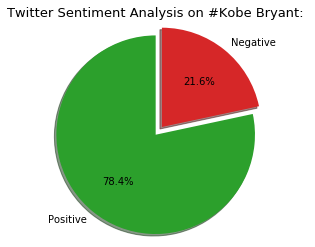

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
def draw_sentiment(pos,neg,hashtag):
    fig1, ax1 = plt.subplots(figsize=(4,4))
    labels = ["Positive", "Negative"]
    sizes = [pos,neg]
    explode = (0, 0.1)  # only "explode" the 2nd slice
    tb_10_green = (44/255,160/255,44/255)
    tb_10_red = (214/255,39/255,40/255)
    colors=[tb_10_green, tb_10_red]
    ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", colors=colors, shadow=True, startangle=90)
    ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title("Twitter Sentiment Analysis on #Kobe Bryant{}: ".format(hashtag), fontsize=13)
plt.show()
draw_sentiment(len(df_pos), len(df_neg), "")

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

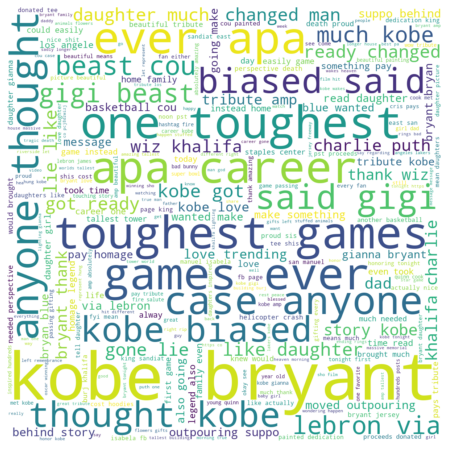

In [0]:
from wordcloud import WordCloud
text = " ".join(original_text for original_text in df.original_text)


wordcloud = WordCloud(max_font_size=200, max_words=250, background_color="white", width=1200, height=1200, contour_width=20, contour_color='steelblue', stopwords=stopwords.words("english")).generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

In [0]:
plt.figure(figsize = (8, 8), facecolor = None)

In [0]:
df.describe()

,Unnamed: 0,id,sentiment
count,35804.000000,35804.000000,35804.000000
mean,17916.463579,17916.463579,0.153305
std,10348.554583,10348.554583,0.326591
min,1.000000,1.000000,-1.000000
25%,8951.750000,8951.750000,0.000000
50%,17914.500000,17914.500000,0.000000
75%,26871.250000,26871.250000,0.318182
max,35856.000000,35856.000000,1.000000


In [0]:
df.polarity.value_counts()

0               11939
0.5              2128
0.8              1260
0.2              1191
0.1               814
                ...  
0.072619048         1
-0.733333333        1
0.151515152         1
0.517857143         1
0.134375            1
Name: polarity, Length: 653, dtype: int64

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
#Vectorize the tweets
vectorizer = TfidfVectorizer(max_features=1000)
vectors = vectorizer.fit_transform(df.original_text)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

,000,10,11,13,15,16,17,1978,1st,20,2016,2018,2020,20am,24,25,25th,26th,30,353,49ers,91,911,93rd,able,about,above,absolutely,across,actually,add,after,again,against,ago,ahead,aicle,ain,aist,alive,...,who,whole,why,wife,will,win,wings,winning,wish,with,without,wiz,woman,women,won,wonderful,wondering,wood,words,work,working,worl,world,worlds,would,wouldn,wow,wrote,ya,yard,year,years,yes,yesterday,yet,yo,you,young,your,zhuri
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.161643,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.223833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.161643,0.0,0.0,0.0


In [0]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [0]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [0]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [0]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [0]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [0]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


In [0]:
pd.isnull(df).sum() > 0

0     True
1     True
2    False
3     True
dtype: bool

In [0]:
pd.isnull(df).sum() > 0

False

In [0]:
print(df.describe())

         Unnamed: 0            id
count  35804.000000  35804.000000
mean   17916.463579  17916.463579
std    10348.554583  10348.554583
min        1.000000      1.000000
25%     8951.750000   8951.750000
50%    17914.500000  17914.500000
75%    26871.250000  26871.250000
max    35856.000000  35856.000000


# Data Collection

In [0]:
import os
import pandas as pd
import tweepy
import re
import string
from textblob import TextBlob
import preprocessor as p
from cleantext import clean
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

 
#Twitter credentials for the app
consumer_key = ""
consumer_secret= ""
access_key= ""
access_secret=""
 
#pass twitter credentials to tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)
 
#file location changed to "data/artificialintelligence_data_extraction/" for clearer path
kobe_tweets = "/home/jyeakins/tweet_kobe/kobe_tweets_data.csv"

 
#columns of the csv file
COLS = ['id', 'created_at', 'source', 'original_text','clean_text', 'sentiment','polarity','subjectivity', 'lang',
        'favorite_count', 'retweet_count', 'original_author', 'possibly_sensitive', 'hashtags',
        'user_mentions', 'place', 'place_coord_boundaries']
 
#set two date variables for date range
start_date = '2020-01-29'

 
# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
#Emoji patterns
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
 
#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)
 
 
#mrhod clean_tweets()
def clean_tweets(tweet):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)
 
    #after tweepy preprocessing the colon left remain after removing mentions
    #or RT sign in the beginning of the tweet
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
 
 
    #remove emojis from tweet
    tweet = emoji_pattern.sub(r'', tweet)
 
    #filter using NLTK library append it to a string
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_tweet = []
 
    #looping through conditions
    for w in word_tokens:
        #check tokens against stop words , emoticons and punctuations
        if w not in stop_words and w not in emoticons and w not in string.punctuation:
            filtered_tweet.append(w)
    return ' '.join(filtered_tweet)
    #print(word_tokens)
    #print(filtered_sentence)
 
#method write_tweets()
def write_tweets(keyword, file):
    # If the file exists, then read the existing data from the CSV file.
    if os.path.exists(file):
        df = pd.read_csv(file, header=0)
    else:
        df = pd.DataFrame(columns=COLS)
    #page attribute in tweepy.cursor and iteration
    for page in tweepy.Cursor(api.search, q=keyword,
                              count=500, include_rts=False, until="2020-01-31").pages(100):
        for status in page:
            new_entry = []
            status = status._json
 
            ## check whether the tweet is in english or skip to the next tweet
            if status['lang'] != 'en':
                continue
 
            #when run the code, below code replaces the retweet amount and
            #no of favorires that are changed since last download.
            if status['created_at'] in df['created_at'].values:
                i = df.loc[df['created_at'] == status['created_at']].index[0]
                if status['favorite_count'] != df.at[i, 'favorite_count'] or \
                   status['retweet_count'] != df.at[i, 'retweet_count']:
                    df.at[i, 'favorite_count'] = status['favorite_count']
                    df.at[i, 'retweet_count'] = status['retweet_count']
                continue
 
 
           #tweepy preprocessing called for basic preprocessing
            clean_text = clean(status['text'])
 
            #call clean_tweet method for extra preprocessing
            filtered_tweet=clean_tweets(clean_text)
 
            #pass textBlob method for sentiment calculations
            blob = TextBlob(filtered_tweet)
            Sentiment = blob.sentiment
 
            #seperate polarity and subjectivity in to two variables
            polarity = Sentiment.polarity
            subjectivity = Sentiment.subjectivity
 
            #new entry append
            new_entry += [status['id'], status['created_at'],
                          status['source'], status['text'],filtered_tweet, Sentiment,polarity,subjectivity, status['lang'],
                          status['favorite_count'], status['retweet_count']]
 
            #to append original author of the tweet
            new_entry.append(status['user']['screen_name'])
 
            try:
                is_sensitive = status['possibly_sensitive']
            except KeyError:
                is_sensitive = None
            new_entry.append(is_sensitive)
 
            # hashtagas and mentiones are saved using comma separted
            hashtags = ", ".join([hashtag_item['text'] for hashtag_item in status['entities']['hashtags']])
            new_entry.append(hashtags)
            mentions = ", ".join([mention['screen_name'] for mention in status['entities']['user_mentions']])
            new_entry.append(mentions)
 
            #get location of the tweet if possible
            try:
                location = status['user']['location']
            except TypeError:
                location = ''
            new_entry.append(location)
 
            try:
                coordinates = [coord for loc in status['place']['bounding_box']['coordinates'] for coord in loc]
            except TypeError:
                coordinates = None
            new_entry.append(coordinates)
 
            single_tweet_df = pd.DataFrame([new_entry], columns=COLS)
            df = df.append(single_tweet_df, ignore_index=True)
    csvFile = open(file, 'a' ,encoding='utf-8')
    df.to_csv(csvFile, mode='a', columns=COLS, index=False, encoding="utf-8")
 
#declare keywords as a query for three categories
kobe_keywords = '#kobe OR #kobebryant OR #KobeAndGigi OR #KobeTribute OR #rememberingkobe OR #RIPKobeBryant OR #KobeRIP OR #KobeandGiana OR #RIPBlackMamba OR #GirlDad OR #GirlDads'

#call main method passing keywords and file path
write_tweets(kobe_keywords,  kobe_tweets)


# Mapping

In [0]:
import os
import conda
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math
import pandas as pd

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

cities=pd.read_csv("/Users/jyeakins/Downloads/cities.csv")
cities=cities.rename(columns={"Unnamed: 0": "city", "name": "count"})
scale = 2.5
%matplotlib qt
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('/Users/jyeakins/Downloads/st99_d00', name='states', drawbounds=True)

# Get the location of each city and plot it
geolocator = Nominatim()
for (city,count) in cities:
    loc = geolocator.geocode(city)
    x, y = map(loc.longitude, loc.latitude)
    map.plot(x,y,marker='o',color='Purple',markersize=int(math.sqrt(count))*scale)
plt.show()# Mapping